**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

| NOMBRE | MATRÍCULA  |
|--------|------------|
| Carlos Avila Arguello | A01796133 |
| Carlos Pano Hernández | A01066264 |
| Hiram Garcia Austria | A00378771 |
| Javier Emmanuel García Escobedo | A01411206|


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Ciencia de Datos/Semana 6"
os.chdir(DIR)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders.binary import BinaryEncoder

In [11]:
def print_formatted_percentage(text, percentage):
    formatted_percentage = "{:.2f}%".format(percentage)
    print(text, formatted_percentage)

In [12]:
# Función para generar Q-Q plot
def qq_plot(data, title, subplot_location):
    plt.subplot(subplot_location)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)

In [13]:
cars_df = pd.read_csv('data/vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [14]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `lon`.


In [15]:
cars_df.shape

(426880, 26)

In [16]:
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df.drop(columns=columns_to_drop, inplace=True)

# Confirming columns removal
cars_df.shape

(426880, 18)

Podemos notar que en vez de las **26 columnas** iniciales ahora solo tenemos **18** pues se eliminaron las **8** que se solicitaron.

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [17]:
num_observaciones, num_columnas = cars_df.shape

print("Número de observaciones: ", num_observaciones)
print("Número de columnas: ", num_columnas)

Número de observaciones:  426880
Número de columnas:  18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [18]:
# Porcentaje de valores faltantes por columna
missing_percentage = cars_df.isnull().sum() / len(cars_df) * 100
missing_percentage

region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

In [19]:
# Eliminar columnas con 30% o más de valores faltantes utilizando el parámetro thresh
columns_to_drop = missing_percentage[missing_percentage >= 30].index
cars_df.dropna(thresh=len(cars_df)*0.7, axis=1, inplace=True)  # thresh se define como 70% de los datos
num_columnas_eliminadas = len(columns_to_drop)

# Imprimir el número de columnas eliminadas
print("Número de columnas eliminadas:", num_columnas_eliminadas)

Número de columnas eliminadas: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [20]:
# Borra los registros que contienen NaN en las columnas con menos del 5% de valores faltantes
cars_df.dropna(subset=missing_percentage[missing_percentage < 5].index, inplace=True)

In [21]:
# Porcentaje de registros eliminados
porcentaje_registros_eliminados = ((num_observaciones - cars_df.shape[0]) / num_observaciones) * 100
print_formatted_percentage("Porcentaje de registros eliminados:", porcentaje_registros_eliminados)

Porcentaje de registros eliminados: 8.73%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [22]:
# Para las variables categóricas usaremos mode
categorical_columns = cars_df.select_dtypes(include=['object']).columns
cars_df[categorical_columns] = cars_df[categorical_columns].fillna(cars_df[categorical_columns].mode().iloc[0])

In [24]:
# Variables numéricas
numeric_columns = cars_df.select_dtypes(include=['int64', 'float64']).columns

# Conocer la simetría de los datos numéricos para definir el método
# 1. Calcular el coeficiente de asimetría para las columnas numéricas
skewness = cars_df[numeric_columns].skew()
# 2. Crear una tabla con los coeficientes de asimetría
skewness_table = pd.DataFrame({'Columna': skewness.index, 'Coeficiente de Asimetría': skewness.values})
skewness_table

,Columna,Coeficiente de Asimetría
0,price,283.573439
1,year,-3.490464
2,odometer,41.650173


In [25]:
# Dado que las variables son asimétricas, se imputan los valores faltantes a través de la mediana:
cars_df[numeric_columns] = cars_df[numeric_columns].fillna(cars_df[numeric_columns].median())

In [26]:
# Corrobar que se manejaron (eliminar y/o imputar) todos los valores faltantes
cars_df.isnull().sum() / len(cars_df) * 100

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64

Podemos notar que ya no hay valores faltantes en el data frame

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

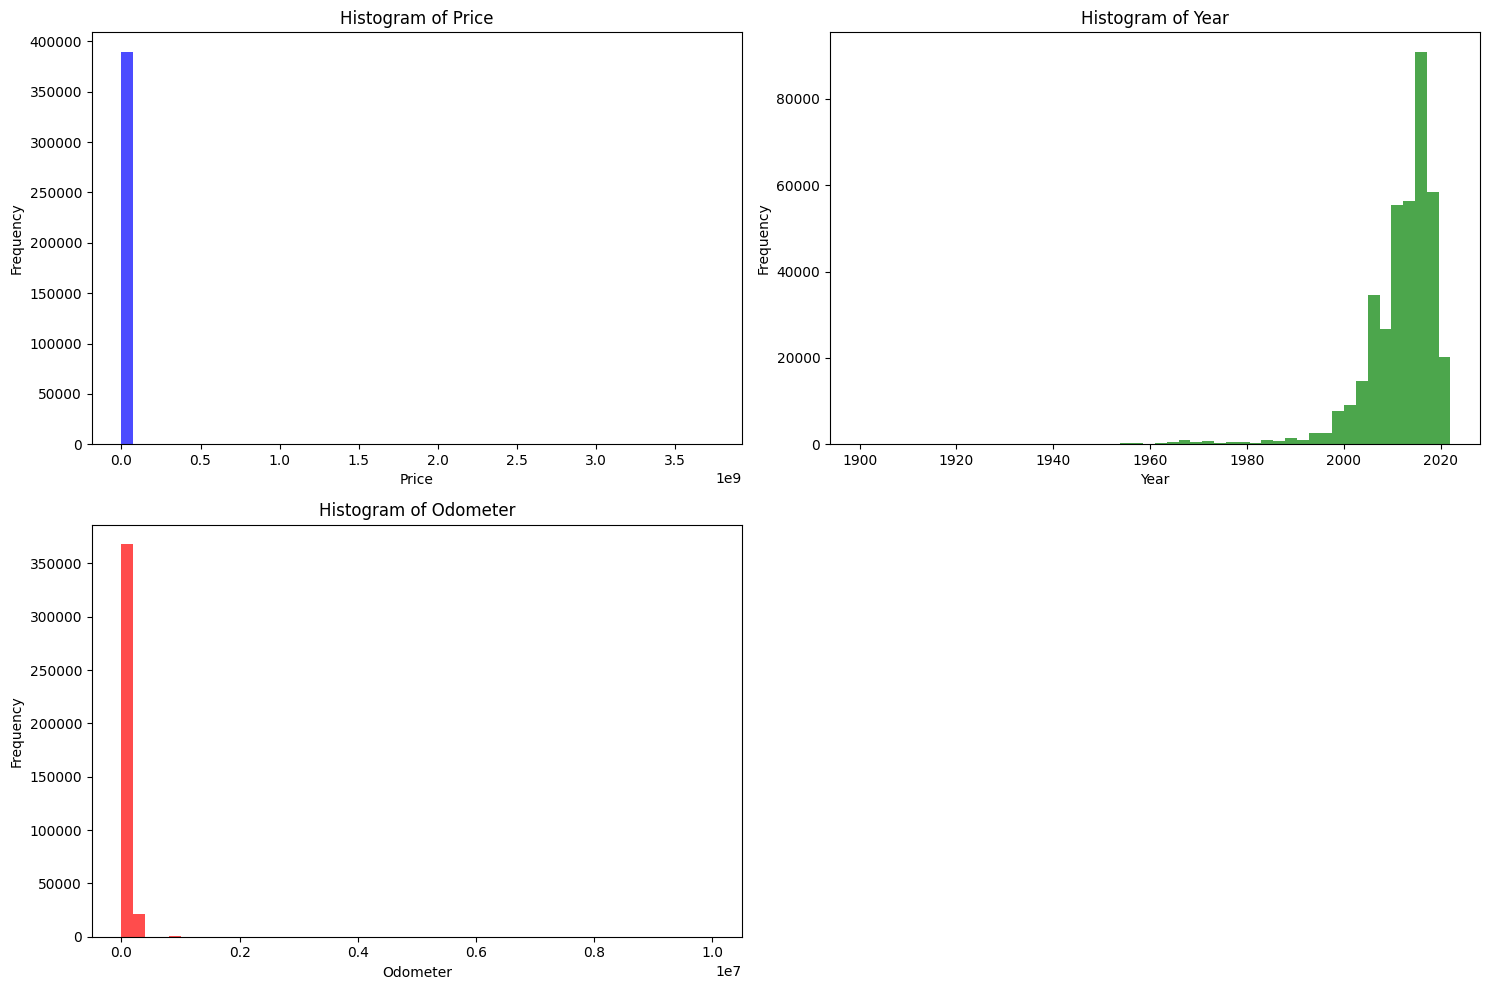

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(cars_df['price'], bins=50, color='blue', alpha=0.7)
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of Price')

axs[0, 1].hist(cars_df['year'], bins=50, color='green', alpha=0.7)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Year')

axs[1, 0].hist(cars_df['odometer'], bins=50, color='red', alpha=0.7)
axs[1, 0].set_xlabel('Odometer')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Odometer')

axs[1, 1].axis('off')

plt.tight_layout()

plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

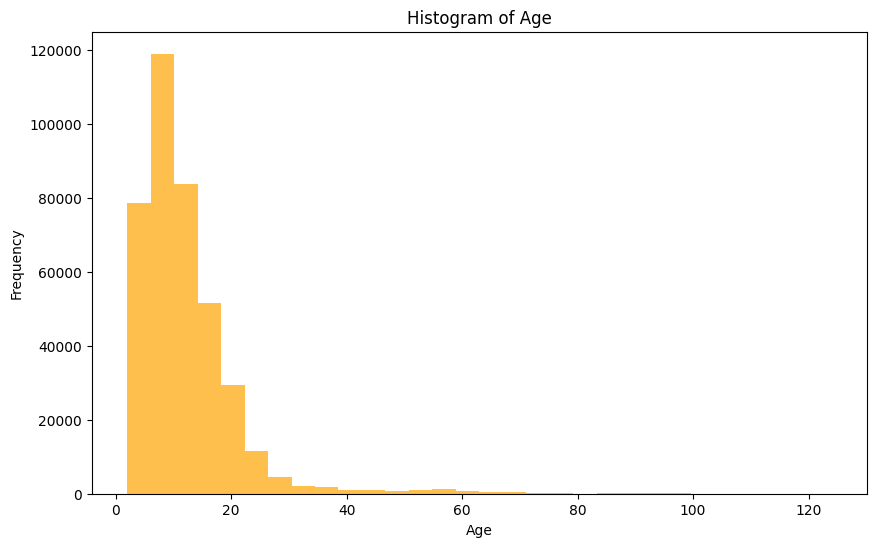

In [28]:
# Calcular la edad del vehículo
current_year = 2024  # Suponiendo que el año actual es 2024
cars_df['age'] = current_year - cars_df['year']

# Eliminar la columna 'year'
cars_df.drop(columns=['year'], inplace=True)

# Histograma de la variable 'age'
plt.figure(figsize=(10, 6))
plt.hist(cars_df['age'], bins=30, color='orange', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

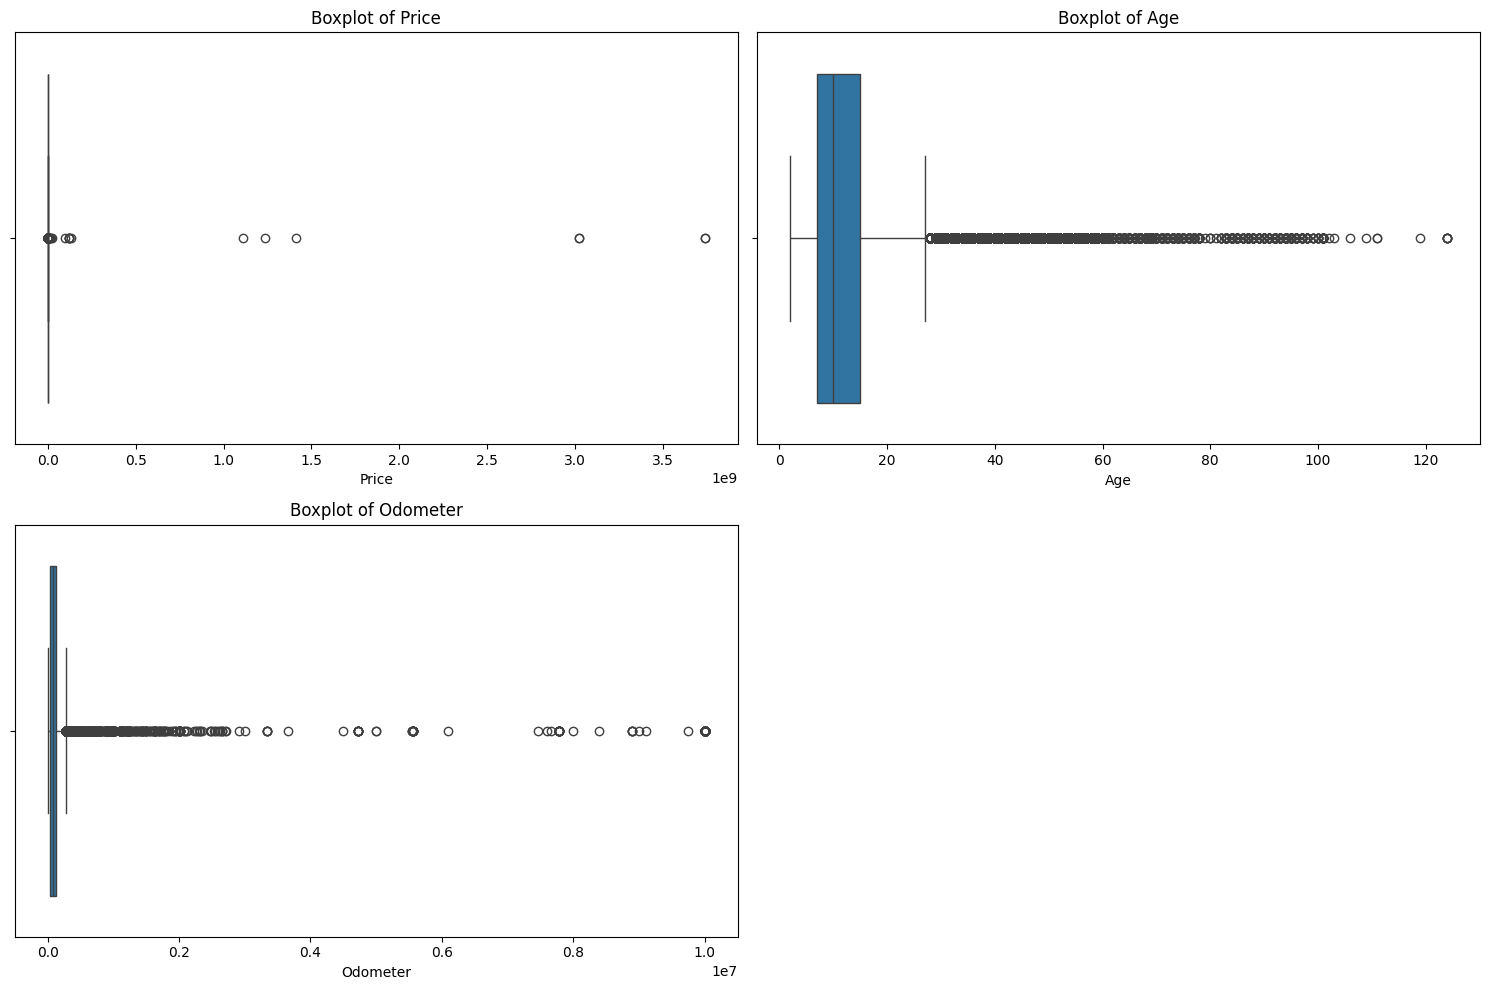

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x=cars_df['price'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Price')
axs[0, 0].set_xlabel('Price')

sns.boxplot(x=cars_df['age'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Age')
axs[0, 1].set_xlabel('Age')

sns.boxplot(x=cars_df['odometer'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Odometer')
axs[1, 0].set_xlabel('Odometer')

axs[1, 1].axis('off')

plt.tight_layout()

plt.show()

Podemos notar en los boxplot que cada variable graficada tiene datos atípicos pues es notoria la presencia de puntos que rebasan los valores extremos (máximos y mínimos) definidos por la función.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [30]:
# Función para obtener los valores atípicos
def outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cars_df[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Valores atípicos para cada variable
outliers_price = outliers(cars_df['price'])
outliers_age = outliers(cars_df['age'])
outliers_odometer = outliers(cars_df['odometer'])

In [31]:
print_formatted_percentage("Porcentaje de Outliers (Price):", len(outliers_price)/len(cars_df)*100 )

Porcentaje de Outliers (Price): 1.71%


In [32]:
print_formatted_percentage("Porcentaje de Outliers (Age):", len(outliers_age)/len(cars_df)*100 )

Porcentaje de Outliers (Age): 3.65%


In [33]:
print_formatted_percentage("Porcentaje de Outliers (Odometer):", len(outliers_odometer)/len(cars_df)*100 )

Porcentaje de Outliers (Odometer): 0.83%


In [34]:
# Eliminación de valores atípicos
# 1. Juntar todos los outliers:
outliers_combined = pd.concat([outliers_price, outliers_age, outliers_odometer], ignore_index = False)
# 2. Eliminar el subconjunto de outliers del df cars
cars_df.drop(outliers_combined.index, inplace = True)

In [35]:
# Porcentaje de registros eliminados
porcentaje_registros_eliminados_outliers = ((num_observaciones - cars_df.shape[0]) / num_observaciones) * 100
print_formatted_percentage("Porcentaje de registros eliminados:", porcentaje_registros_eliminados_outliers)

Porcentaje de registros eliminados: 14.18%


Con respecto al número de observaciones del data frame inicial, se han eliminado 14.18% de esas observaciones, lo cual considera las eliminaciones por valores faltantes así como las que corresponden a los valores atípicos.
Para conocer el efecto preciso de eliminación por valores atípicos, consideremos el resultado de la pregunta 2b:
- El 8.73% de las observaciones se borraron por pertener a variables con datos faltantes.
- En total se han eliminado 14.18% de las observaciones

Por lo tanto, el efecto de eliminación de observaciones por datos atípicos es del 5.45% del data frame original.

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

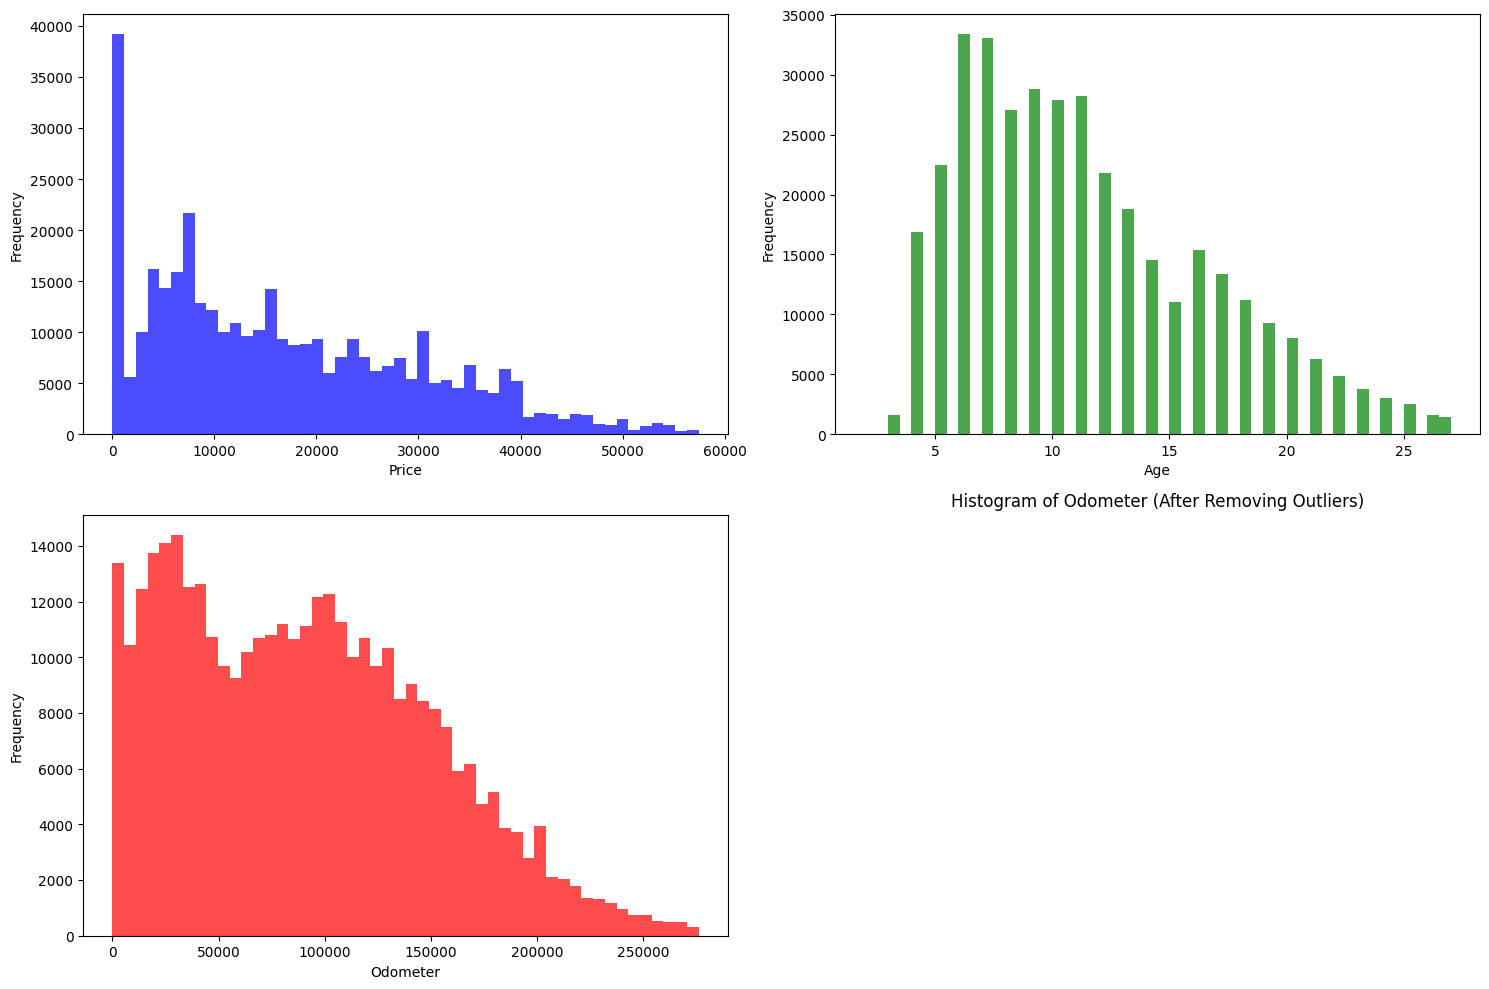

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].hist(cars_df['price'], bins=50, color='blue', alpha=0.7)
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')
plt.title('Histogram of Price (After Removing Outliers)')

axs[0, 1].hist(cars_df['age'], bins=50, color='green', alpha=0.7)
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')
plt.title('Histogram of Age (After Removing Outliers)')

axs[1, 0].hist(cars_df['odometer'], bins=50, color='red', alpha=0.7)
axs[1, 0].set_xlabel('Odometer')
axs[1, 0].set_ylabel('Frequency')
plt.title('Histogram of Odometer (After Removing Outliers)')

axs[1, 1].axis('off')

plt.tight_layout()

plt.show()

Podemos observar que el eliminar valores atípicos, mejora la visualización de las distribuaciones focalizando los datos menos extremos. Además es más clara la asimetría de las distribuciones de estas variables (sesgo derecho).

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


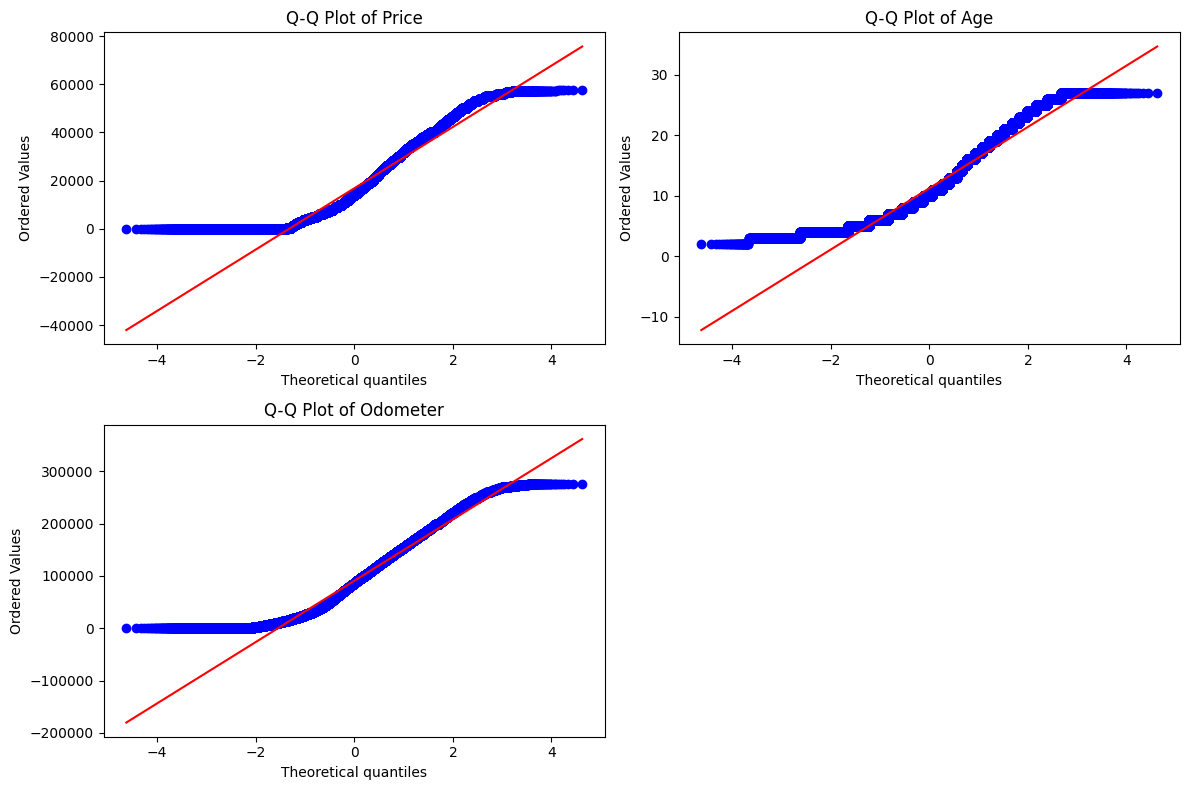

In [37]:
plt.figure(figsize=(12, 8))

# Q-Q plot for 'price'
plt.subplot(2, 2, 1)
qq_plot(cars_df['price'], 'Q-Q Plot of Price', 221)

# Q-Q plot for 'age'
plt.subplot(2, 2, 2)
qq_plot(cars_df['age'], 'Q-Q Plot of Age', 222)

# Q-Q plot for 'odometer'
plt.subplot(2, 2, 3)
qq_plot(cars_df['odometer'], 'Q-Q Plot of Odometer', 223)

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación.

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [38]:
# Creamos una copia del DataFrame para aplicar la transformación
transf_df = cars_df.copy()

# Aplicamos la transformación Yeo-Johnson a las variables 'price', 'age' y 'odometer'
pt = PowerTransformer(method='yeo-johnson')
transf_df[['price', 'odometer']] = pt.fit_transform(transf_df[['price', 'odometer']])

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

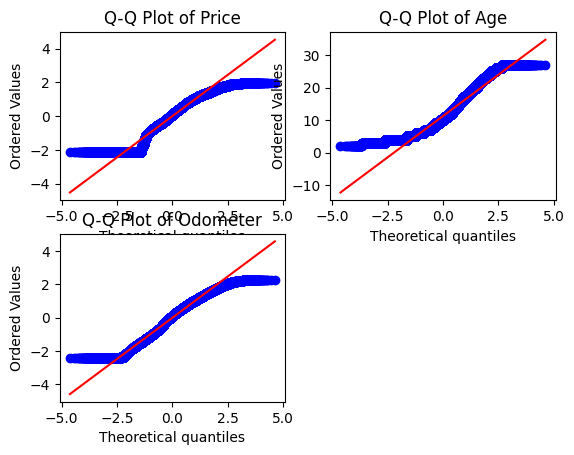

In [39]:
# Q-Q plot después de la transformación Yeo-Johnson
qq_plot(transf_df['price'], 'Q-Q Plot of Price', 221)
qq_plot(transf_df['age'], 'Q-Q Plot of Age', 222)
qq_plot(transf_df['odometer'], 'Q-Q Plot of Odometer', 223)

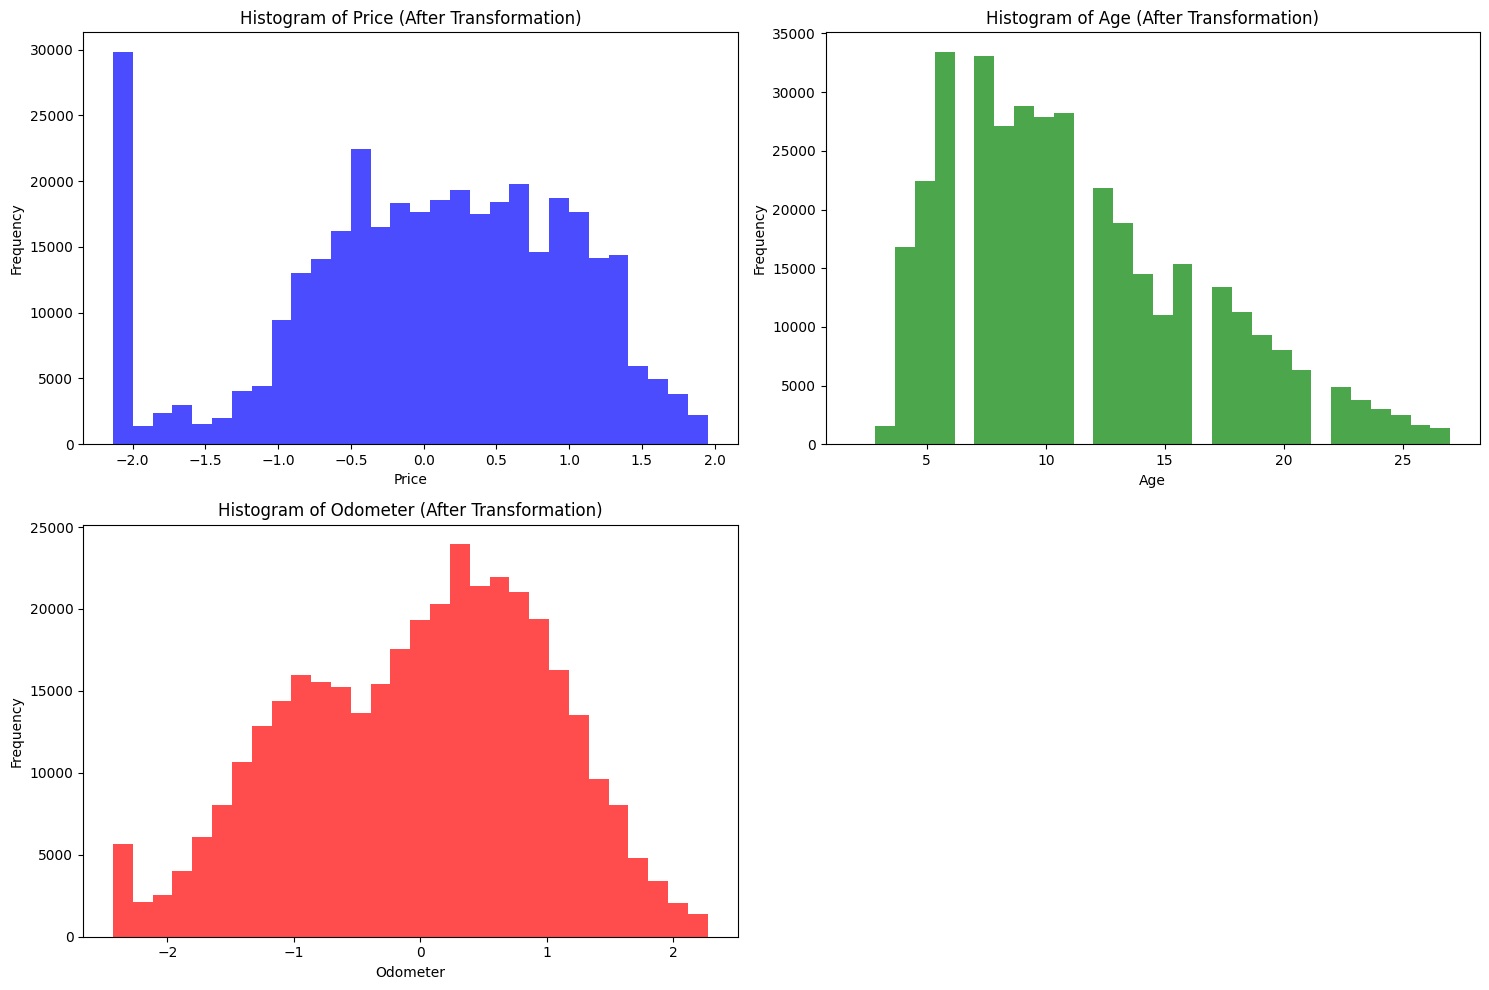

In [40]:
# Histogramas después de la transformación Yeo-Johnson
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(transf_df['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price (After Transformation)')

plt.subplot(2, 2, 2)
plt.hist(transf_df['age'], bins=30, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (After Transformation)')

plt.subplot(2, 2, 3)
plt.hist(transf_df['odometer'], bins=30, color='red', alpha=0.7)
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Odometer (After Transformation)')

plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [41]:
# Creamos una copia del DataFrame para aplicar el escalado Min-Max
minmax_df = transf_df.copy()

# Aplicamos el escalado Min-Max a las variables 'price', 'age' y 'odometer'
scaler = MinMaxScaler()
minmax_df[['price', 'age', 'odometer']] = scaler.fit_transform(minmax_df[['price', 'age', 'odometer']])

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

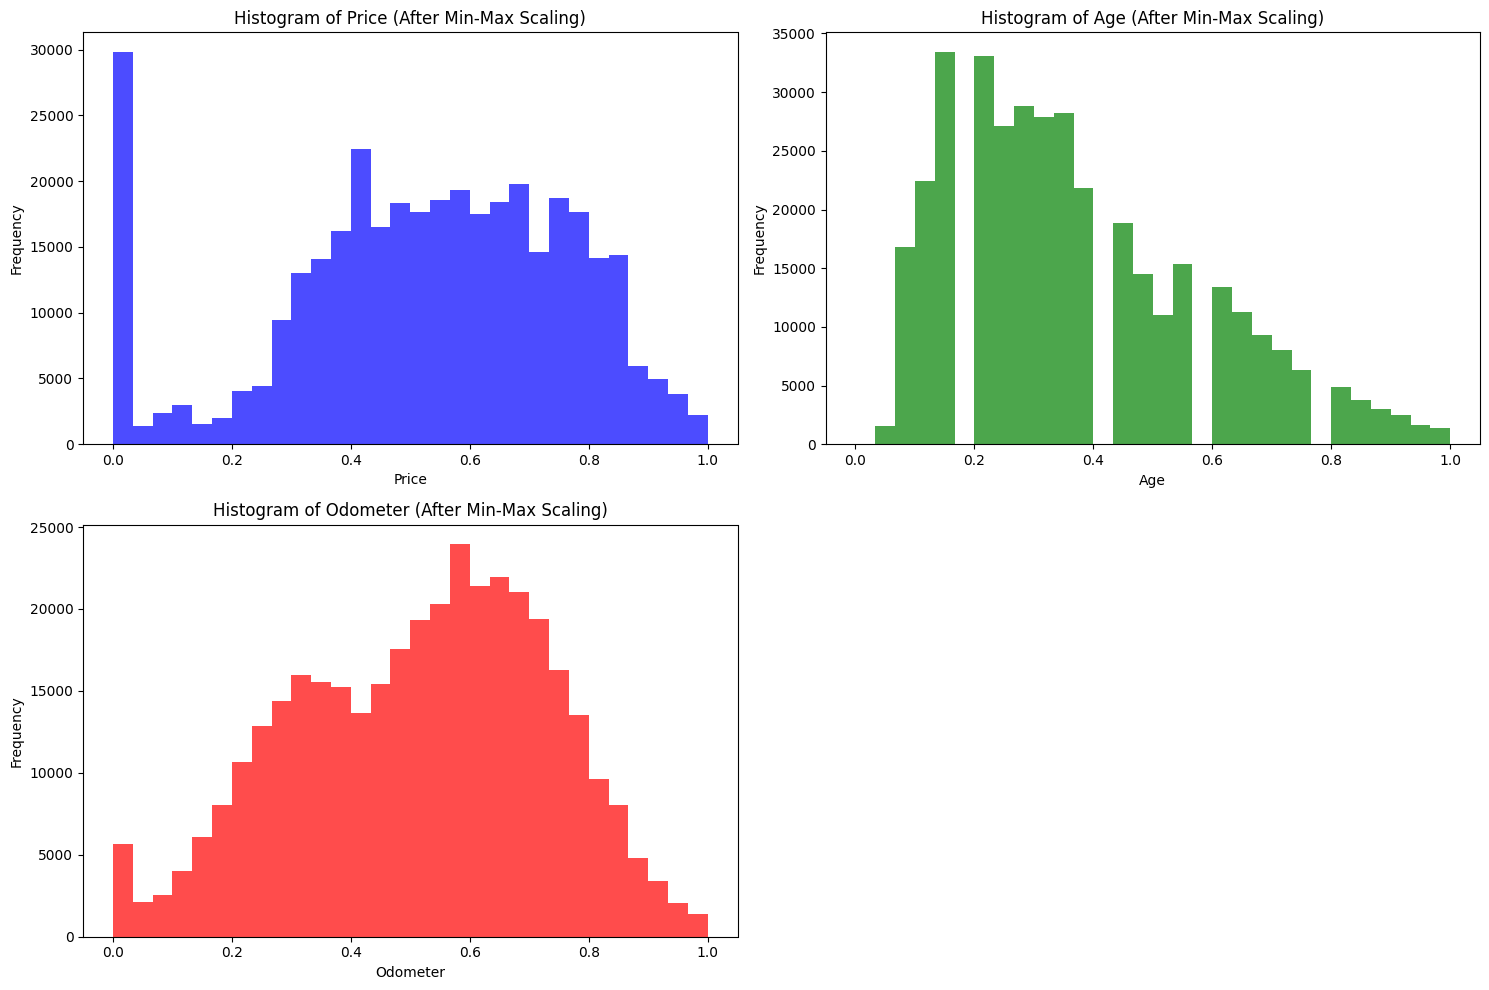

In [42]:
# Histogramas después del escalado Min-Max
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(minmax_df['price'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price (After Min-Max Scaling)')

plt.subplot(2, 2, 2)
plt.hist(minmax_df['age'], bins=30, color='green', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age (After Min-Max Scaling)')

plt.subplot(2, 2, 3)
plt.hist(minmax_df['odometer'], bins=30, color='red', alpha=0.7)
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Odometer (After Min-Max Scaling)')

plt.tight_layout()
plt.show()

Efectivamente el escalamiento se aplicó correctamente y no afectó la distribución que se había logrado con las transformaciones aplicadas.

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [43]:
# Resumen de estadísticas descriptivas para variables categóricas
cars_df.describe(include = 'object').T

,count,unique,top,freq
region,366328,404,columbus,3188
region_url,366328,413,https://grandrapids.craigslist.org,2737
manufacturer,366328,40,ford,61660
model,366328,19097,f-150,7436
fuel,366328,5,gas,312085
title_status,366328,6,clean,354717
transmission,366328,3,automatic,291628
type,366328,13,sedan,154259
state,366328,51,ca,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [53]:
# Identificar variables con alta cardinalidad (más de 100 categorías únicas)
highly_cardinal_variables = []
few_cardinal_variables = []
for column in categorical_columns:
    if cars_df[column].nunique() > 400:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

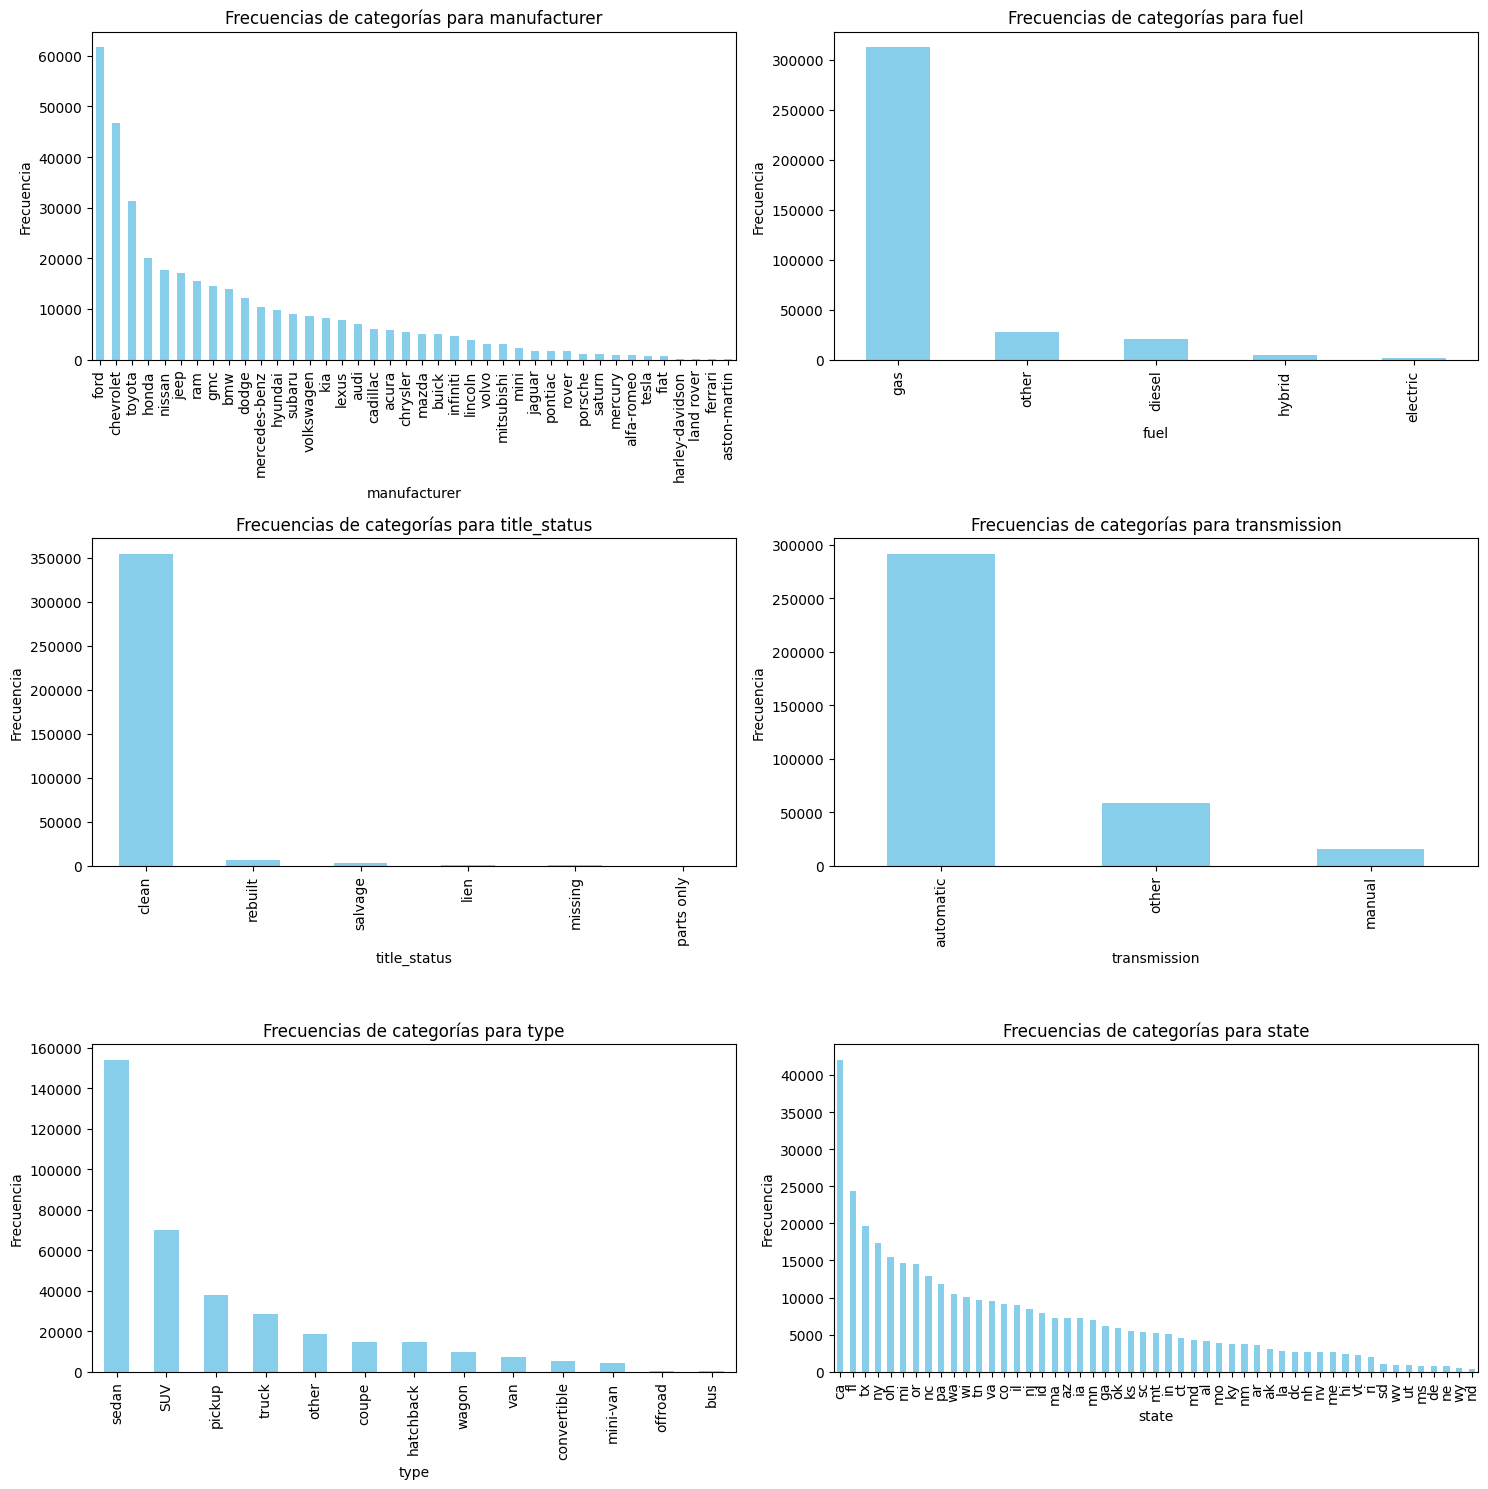

In [54]:
num_plots = len(few_cardinal_variables)
num_rows = num_plots // 2
num_cols = 2 if num_plots % 2 == 0 else 3

plt.figure(figsize=(15, 5*num_rows))

for i, column in enumerate(few_cardinal_variables):
    plt.subplot(num_rows, num_cols, i+1)
    cars_df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencias de categorías para {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [72]:
# Aplicar codificación one-hot a las variables en few_cardinal_variables
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(minmax_df[few_cardinal_variables])
encoded_columns = encoder.get_feature_names_out(input_features=few_cardinal_variables)
onehot_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)
onehot_df.index = minmax_df.index
onehot_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426877,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [73]:
# Aplicar codificación binaria a las variables en highly_cardinal_variables
encoder = BinaryEncoder(cols=highly_cardinal_variables)
binary_df = encoder.fit_transform(minmax_df[highly_cardinal_variables])
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [81]:
# Primero quitaremos las columnas categóricas del minmax_df para que
# el resultado sea una tabla de puras variables categóricas cofidicadas así
# como variables numéricas transformadas y escaladas.
minmax_df.drop(columns=categorical_columns, inplace=True)

#Concatenar los Dataframes
final_df = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
final_df.reset_index(drop=True, inplace= True)
final_df

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.437060,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.487739,0.48,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.242839,0.08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.364403,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.665534,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.320145,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.189543,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.107714,0.08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.308810,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1


Podemos notar que hemos realizado el tratamiendo de los datos completo:

0. Eliminamos las columnas irrelevantes para el análisis.
1.   Eliminamos las columnas con demasiados valores faltantes.
2.   Eliminamos las observaciones que correspondían a columnas con poca información faltante.
3. Eliminamos observaciones correspondientes a datos atípicos.
4. Transformamos las variables numéricas que tenían un sesgo muy marcado para normalizar su distribución.
5. Escalamos las variables numéricas para que el peso en modelos de ML no fuera influyente por valores de escala distintos.
6. Codificamos las variables categóricas con dos métodos correspondientes a las nominales a fin de usarlas en modelos que solo entienden números para su codificación.

